In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
import seaborn as sns
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv("pricerunner_aggregate.csv")

In [30]:
df.head()

,Product ID,Product Title,Merchant ID,Cluster ID,Cluster Label,Category ID,Category Label
0,1,apple iphone 8 plus 64gb silver,1,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
1,2,apple iphone 8 plus 64 gb spacegrau,2,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
2,3,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,3,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
3,4,apple iphone 8 plus 64gb space grey,4,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
4,5,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,5,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones


In [31]:
df.dtypes

Product ID          int64
Product Title      object
 Merchant ID        int64
 Cluster ID         int64
 Cluster Label     object
 Category ID        int64
 Category Label    object
dtype: object

In [32]:
df.isnull().sum()

Product ID         0
Product Title      0
 Merchant ID       0
 Cluster ID        0
 Cluster Label     0
 Category ID       0
 Category Label    0
dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35311 entries, 0 to 35310
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Product ID       35311 non-null  int64 
 1   Product Title    35311 non-null  object
 2    Merchant ID     35311 non-null  int64 
 3    Cluster ID      35311 non-null  int64 
 4    Cluster Label   35311 non-null  object
 5    Category ID     35311 non-null  int64 
 6    Category Label  35311 non-null  object
dtypes: int64(4), object(3)
memory usage: 1.9+ MB


In [34]:
df.columns

Index(['Product ID', 'Product Title', ' Merchant ID', ' Cluster ID',
       ' Cluster Label', ' Category ID', ' Category Label'],
      dtype='object')

In [35]:
df = df.drop(" Cluster Label", axis = 1)
df = df.drop("Product Title", axis = 1)

In [36]:
X = df.drop(" Category Label", axis = 1)

In [37]:
X

,Product ID,Merchant ID,Cluster ID,Category ID
0,1,1,1,2612
1,2,2,1,2612
2,3,3,1,2612
3,4,4,1,2612
4,5,5,1,2612
...,...,...,...,...
35306,47350,59,47517,2623
35307,47351,59,47518,2623
35308,47352,59,47519,2623
35309,47355,125,47524,2623


In [38]:
y = df[" Category Label"]

In [39]:
y

0        Mobile Phones
1        Mobile Phones
2        Mobile Phones
3        Mobile Phones
4        Mobile Phones
             ...      
35306          Fridges
35307          Fridges
35308          Fridges
35309          Fridges
35310          Fridges
Name:  Category Label, Length: 35311, dtype: object

In [40]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)



In [41]:
y

array([7, 7, 7, ..., 5, 5, 5])

In [42]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<AxesSubplot:xlabel=' Category Label', ylabel=' Merchant ID'>

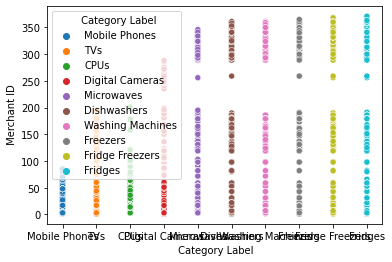

In [44]:
sns.scatterplot(x=df[' Category Label'],y=df[' Merchant ID'], hue=df[' Category Label'])

<AxesSubplot:xlabel=' Category Label', ylabel=' Merchant ID'>

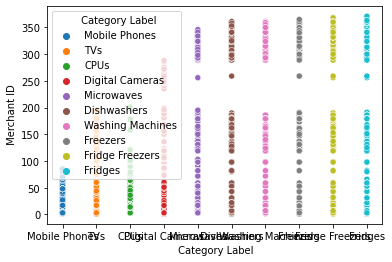

In [45]:
sns.scatterplot(x=df[' Category Label'],y=df[' Merchant ID'], hue=df[' Category Label'])

<AxesSubplot:ylabel=' Merchant ID'>

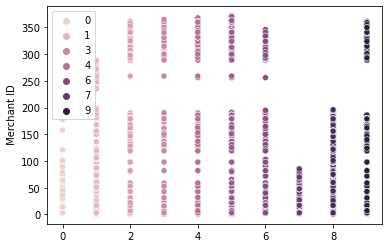

In [46]:
sns.scatterplot(x=y,y=df[' Merchant ID'], hue=y)

In [23]:
k_values = [i for i in range (20,31)]
scores_1 = []
scores_2 = []
scores_3 = []


for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    score = cross_val_score(knn, X, y, cv=5)
    scores_1.append(np.mean(score))

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    score = cross_val_score(knn, X, y, cv=5)
    scores_2.append(np.mean(score))

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    score = cross_val_score(knn, X, y, cv=5)
    scores_3.append(np.mean(score))

In [32]:
scores_2

[0.8711793077418337,
 0.8713491991985551,
 0.8712925660398406,
 0.8714058243378474,
 0.8713775117682012,
 0.8716606775617732,
 0.871858909656118,
 0.8719438513747676,
 0.8719438553844785,
 0.8718588936172738,
 0.8722553537962521]

In [33]:
scores_3 == scores_1

True

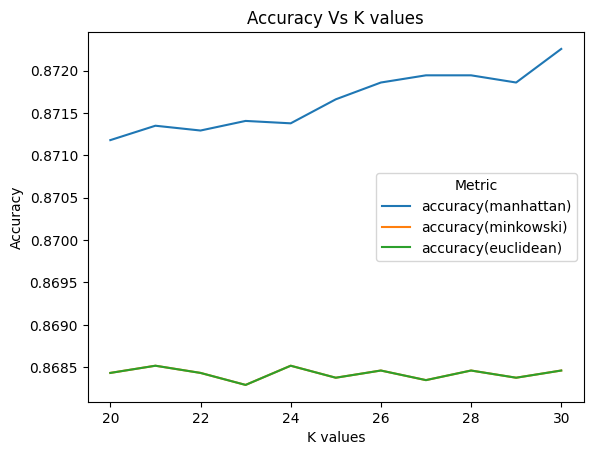

In [31]:
data = {'X': k_values, 'accuracy(manhattan)': scores_2, 'accuracy(minkowski)': scores_3, 'accuracy(euclidean)': scores_1}
df1 = pd.DataFrame(data)

# Melt the DataFrame
df_melted = pd.melt(df1, id_vars='X', var_name='Metric', value_name='Accuracy')

# Use Seaborn to create the line plot
sns.lineplot(x='X', y='Accuracy', hue='Metric', data=df_melted)

# Add labels and title
plt.xlabel('K values')
plt.ylabel('Accuracy')
plt.title('Accuracy Vs K values')

# Show the plot
plt.show()